In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
file_path = r"EastWestAirlines.xlsx"
df = pd.read_excel(file_path, sheet_name="data")
df.drop(columns=["ID#", "Award?"], inplace=True)
print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

Dataset shape: (3999, 10)
Missing values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64


In [3]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
mi

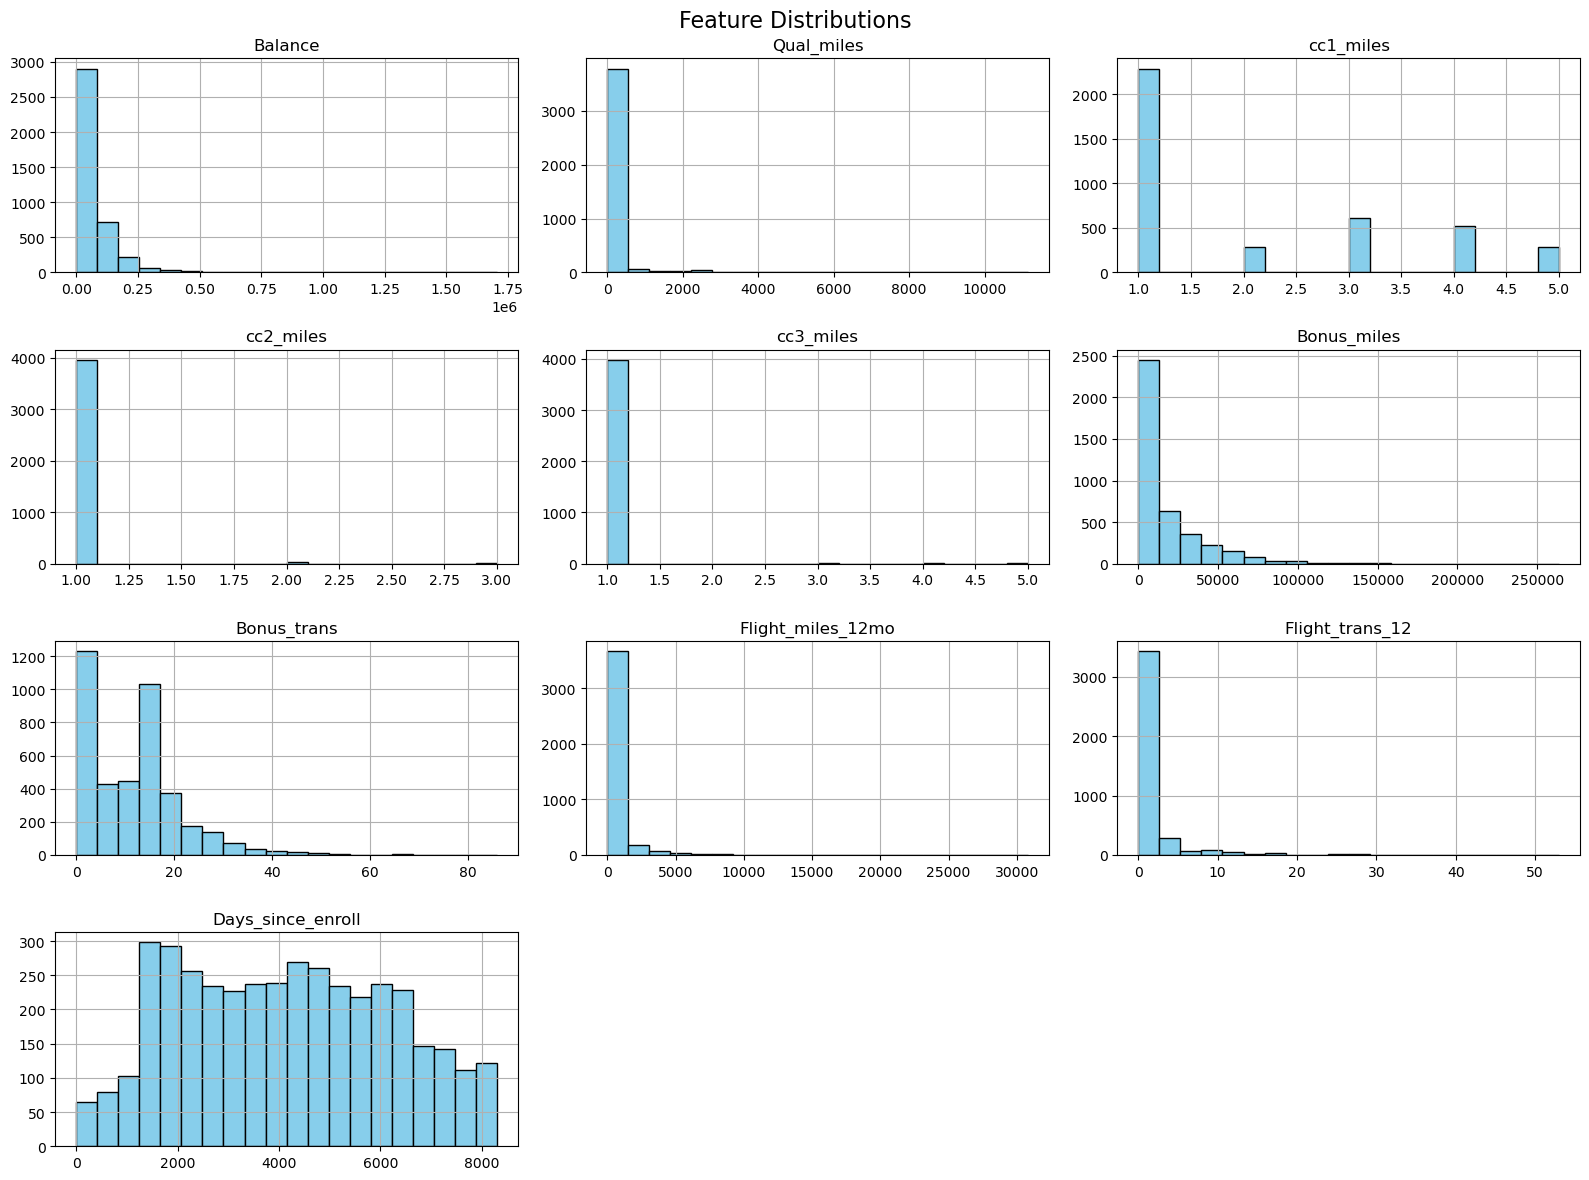

In [4]:
df.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

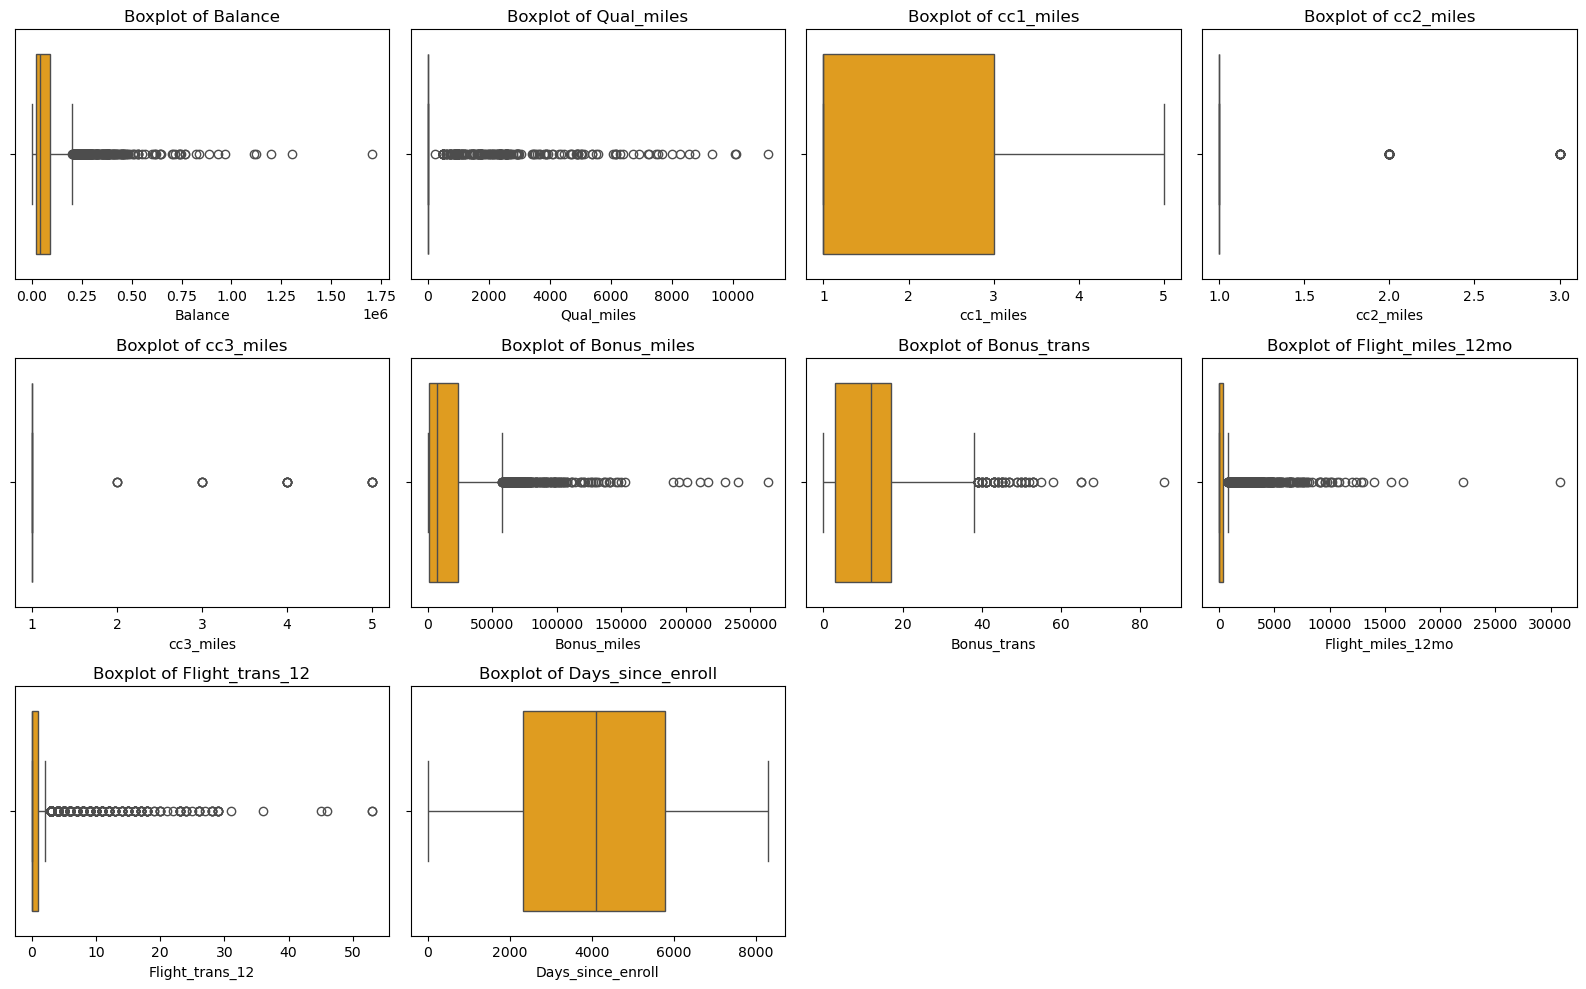

In [5]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x=column, color='orange')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

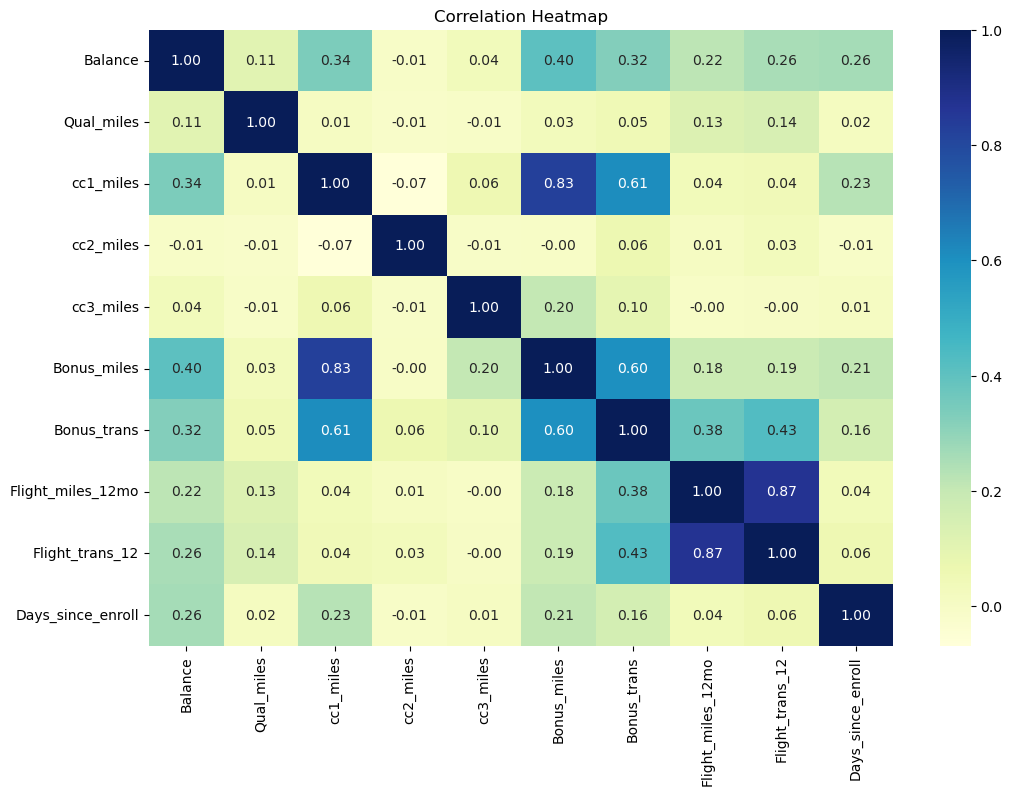

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

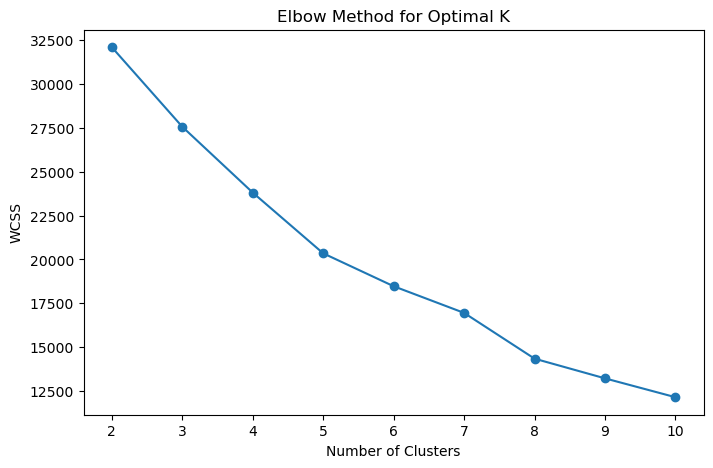

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


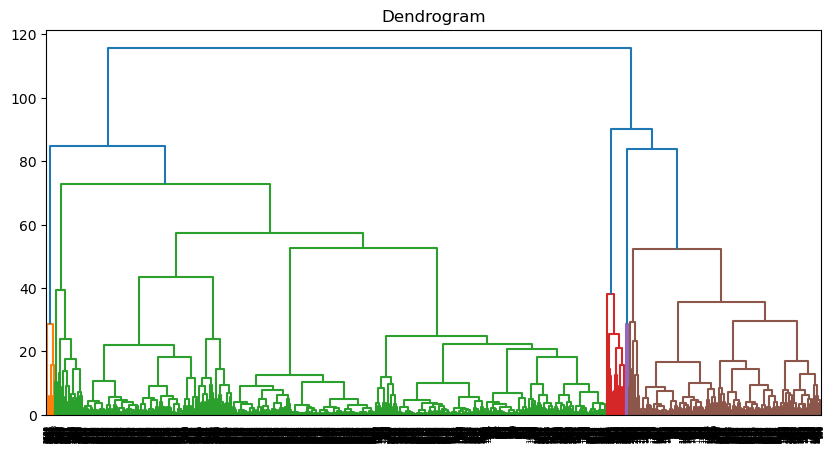

In [8]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)
distance_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(distance_matrix)
plt.title("Dendrogram")
plt.show()

Silhouette Score (K-Means): 0.33215497003333044
Silhouette Score (Hierarchical): 0.3350233247024554


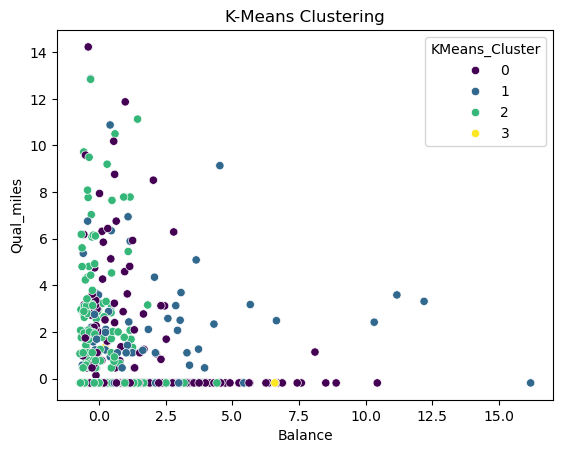

In [9]:
df['Hierarchical_Cluster'] = fcluster(distance_matrix, optimal_k, criterion='maxclust')
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)
print("Silhouette Score (K-Means):", silhouette_score(df_scaled, df['KMeans_Cluster']))
print("Silhouette Score (Hierarchical):", silhouette_score(df_scaled, df['Hierarchical_Cluster']))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

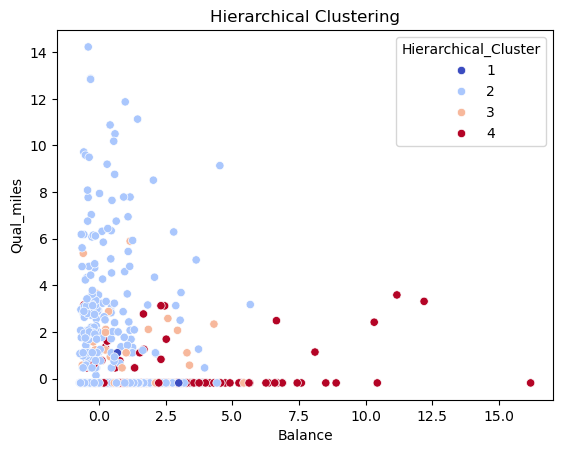

Clustering Analysis Completed


In [10]:
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clustering')
plt.show()
print("Clustering Analysis Completed")

In [11]:
df = pd.read_excel(file_path, sheet_name="data")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


(None,
    ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0    1    28143           0          1          1          1          174   
 1    2    19244           0          1          1          1          215   
 2    3    41354           0          1          1          1         4123   
 3    4    14776           0          1          1          1          500   
 4    5    97752           0          4          1          1        43300   
 
    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
 0            1                  0                0               7000       0  
 1            2                  0                0               6968       0  
 2            4                  0                0               7034       0  
 3            1                  0                0               6952       0  
 4           26               2077                4               6935       1  )

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


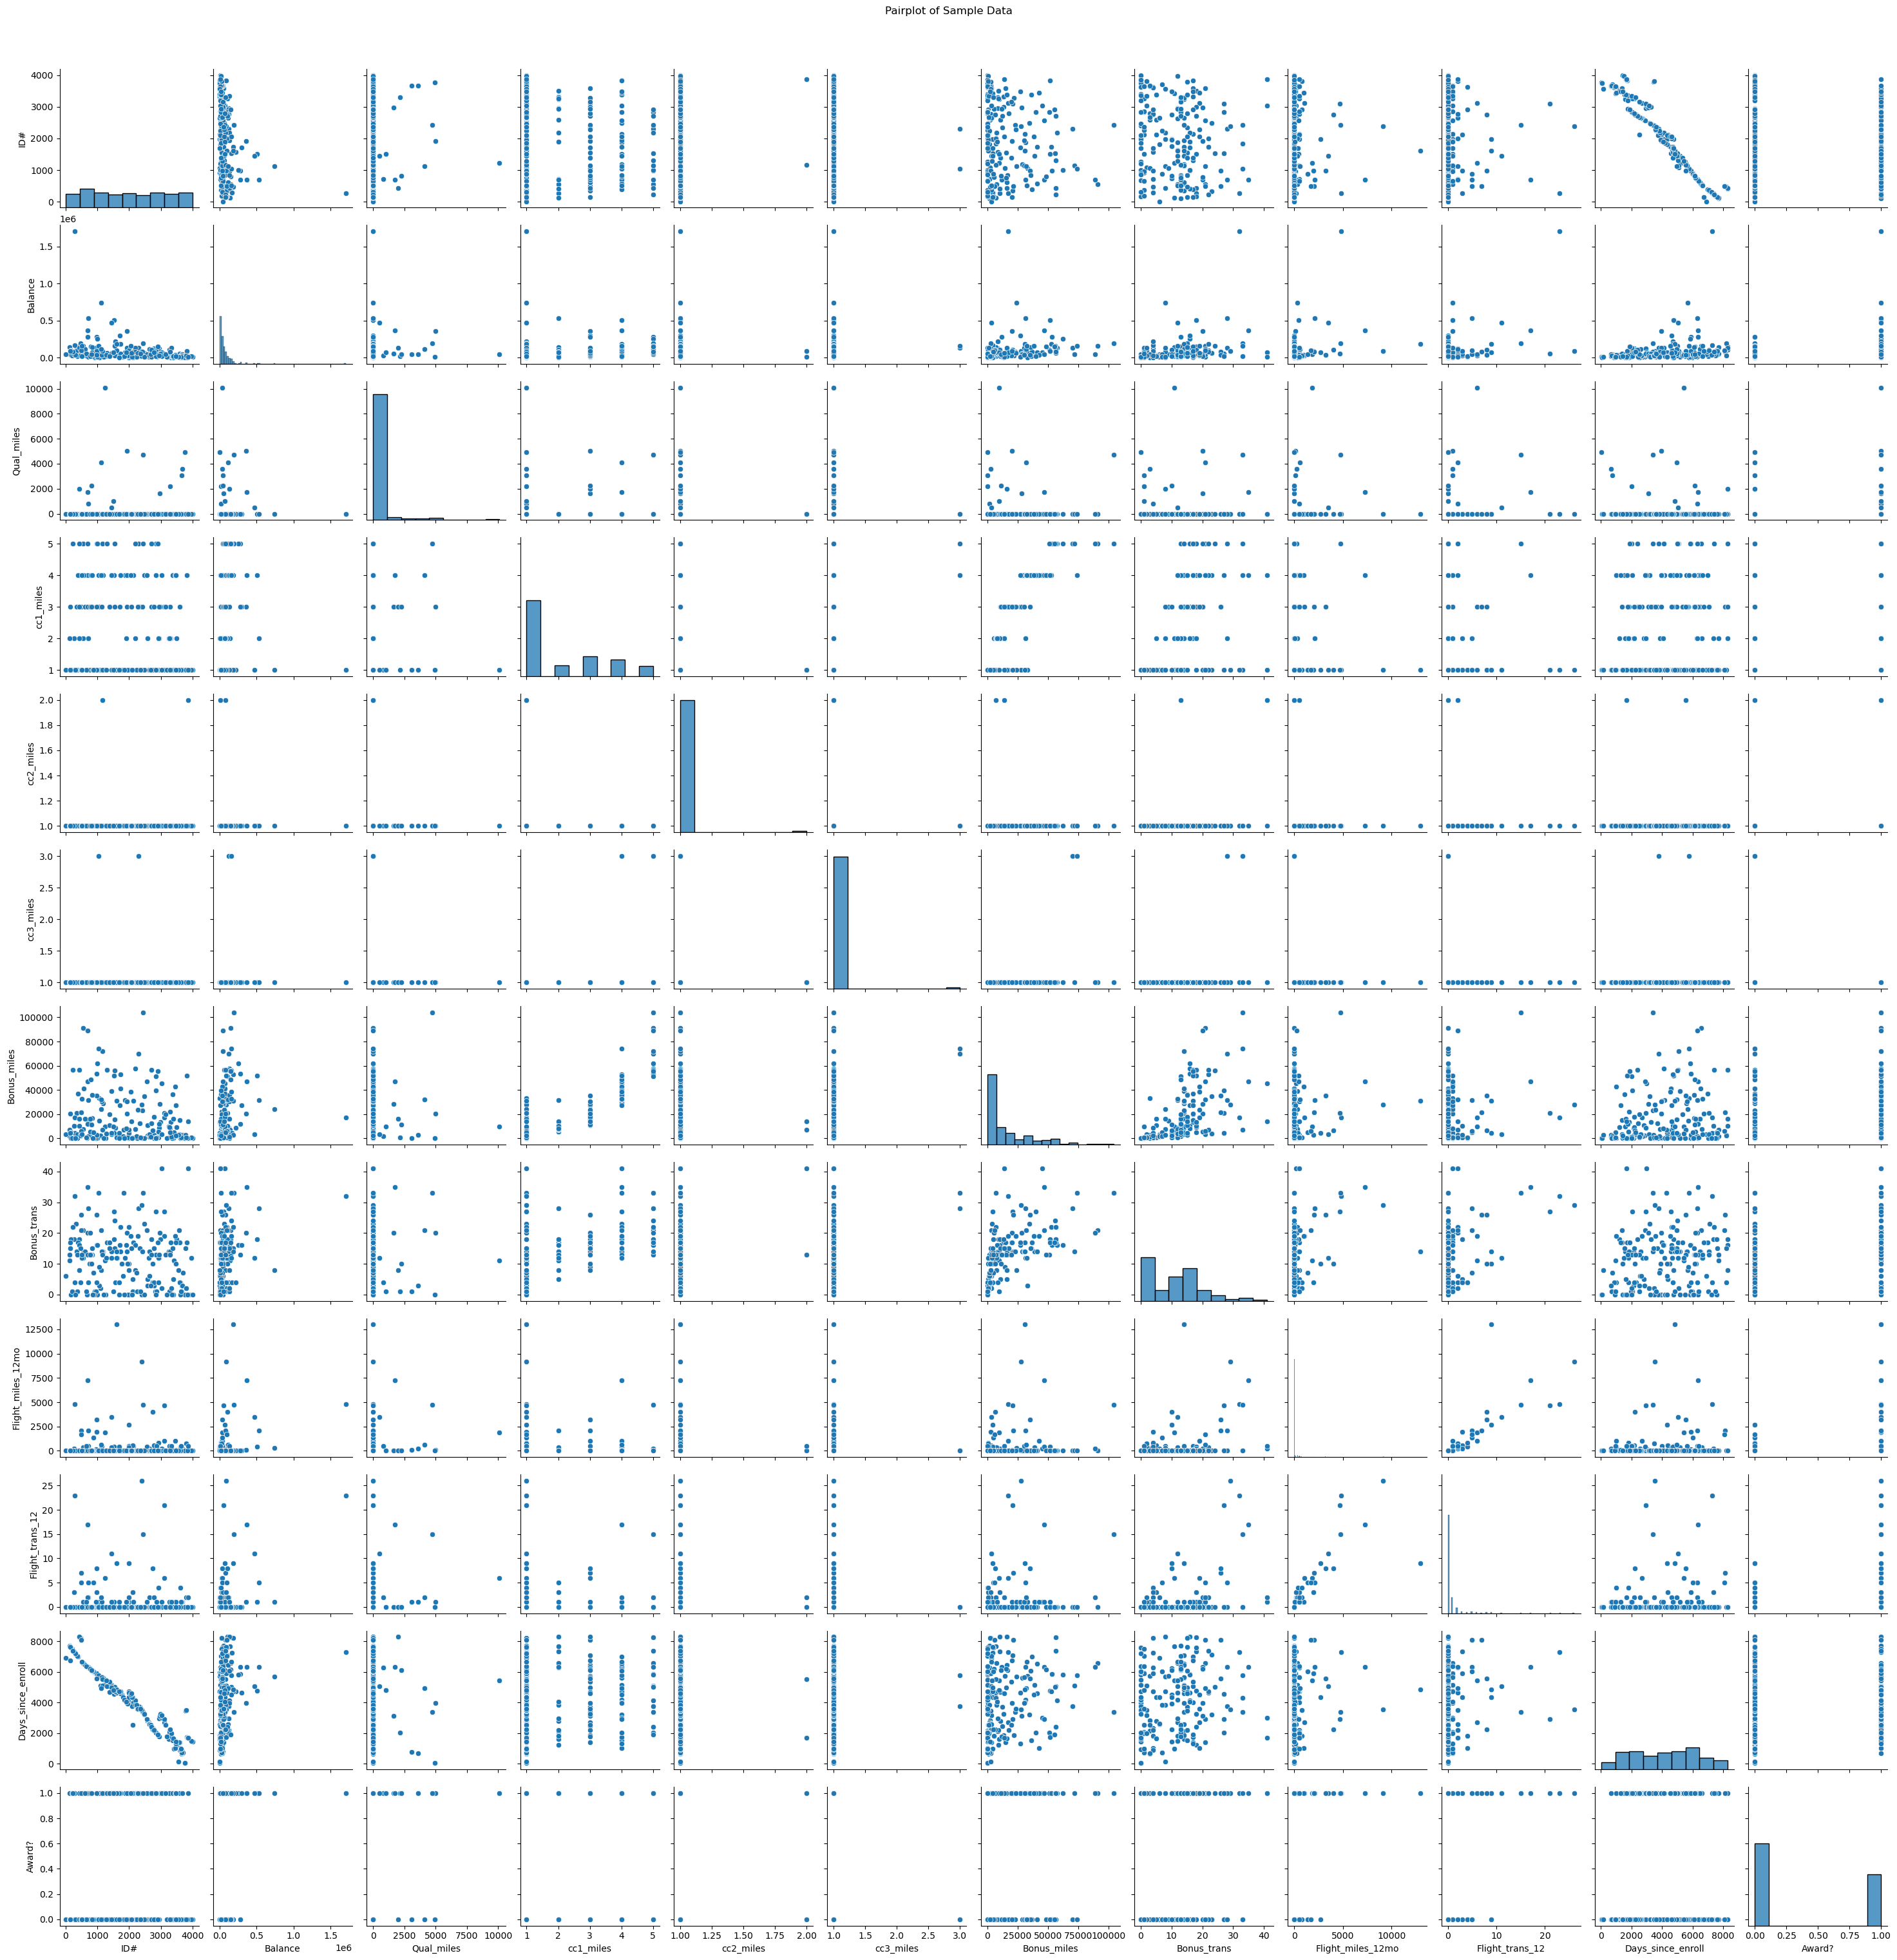

In [12]:
sns.pairplot(df.sample(200))  
plt.suptitle("Pairplot of Sample Data", y=1.02)
plt.show()